# Работа с датасетом Omniglot

---



# Загрузка датасета Omniglot

In [1]:
from sklearn.metrics import accuracy_score
from google.colab import drive
import numpy as np
import os

drive.mount('/content/drive')

PATH = 'drive/My Drive/Few-Shot-Learning/Omniglot-data-set'

RANDOM_STATE = 17

X_train = np.loadtxt(os.path.join(PATH, 'train_images.txt'), dtype=np.uint8)
y_train = np.loadtxt(os.path.join(PATH, 'train_labels.txt'), dtype='str')

X_train = np.resize(X_train, (X_train.shape[0] // 210, 105 * 105))
y_train = np.resize(y_train, (y_train.shape[0] // 2))

X_test = np.loadtxt(os.path.join(PATH, 'test_images.txt'), dtype=np.uint8)
y_test = np.loadtxt(os.path.join(PATH, 'test_labels.txt'), dtype='str')

X_test = np.resize(X_test, (X_test.shape[0] // 210, 105 * 105))
y_test = np.resize(y_test, (y_test.shape[0] // 2))

Mounted at /content/drive


# Визуализация датасета Omniglot

label: Japanese_(hiragana)_38


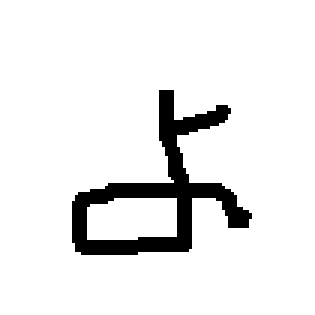

In [2]:
from PIL import Image

digit_number = -1

image = Image.fromarray(X_train.reshape((-1, 105, 105))[digit_number], mode='P')

print('label: {}'.format(y_train[digit_number]))
display(image.resize((315, 315)))

# Использование дерева решений для решения задачи классификации рукописных символов

Импорты

In [3]:
from sklearn.tree import DecisionTreeClassifier

Обучение дерева решений

In [4]:
tree = DecisionTreeClassifier(max_depth=20, random_state=RANDOM_STATE)

tree.fit(X_train, y_train)

y_tree_pred = tree.predict(X_test)

Вычисление метрик для оценки качества работы дерева решений

In [5]:
print('accuracy: {:.3}'.format(accuracy_score(y_test, y_tree_pred)))

accuracy: 0.0232


# Использование метода ближайших соседей для решения задачи классификации рукописных символов

Импорты

In [6]:
from sklearn.neighbors import KNeighborsClassifier

Обучение модели на методе ближайших соседей

In [7]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

Вычисление метрик для оценки качества работы метода ближайших соседей

In [8]:
print('accuracy: {:.3}'.format(accuracy_score(y_test, y_knn_pred)))

accuracy: 0.0752


# Использование логистической регрессии для решения задачи классификации рукописных символов

Импорты

In [9]:
from sklearn.linear_model import LogisticRegression

Обучение модели логистической регрессии

In [10]:
logit = LogisticRegression(n_jobs=-1, random_state=RANDOM_STATE)

logit.fit(X_train, y_train)

y_logit_pred = logit.predict(X_test)

Вычисление метрик для оценки качества работы логистической регрессии

In [11]:
print('accuracy: {:.3}'.format(accuracy_score(y_test, y_logit_pred)))

accuracy: 0.239


# Использование случайного леса для решения задачи классификации рукописных символов

Импорты

In [12]:
from sklearn.ensemble import RandomForestClassifier

Обучение случайного леса

In [13]:
rf = RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)

rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

Вычисление метрик для оценки качества работы случайного леса

In [14]:
print('accuracy: {:.3}'.format(accuracy_score(y_test, y_rf_pred)))

accuracy: 0.152


# Использование случайного выбора для решения задачи классификации рукописных символов

Импорты

In [15]:
from sklearn.dummy import DummyClassifier

Обучение случайного выбора

In [16]:
rand = DummyClassifier(strategy='uniform', random_state=RANDOM_STATE)

rand.fit(X_train, y_train)

y_rand_pred = rand.predict(X_test)

Вычисление метрик для оценки качества работы случайного выбора

In [17]:
print('accuracy: {:.3}'.format(accuracy_score(y_test, y_rand_pred)))

accuracy: 0.00103


# Сравнение четырех методов для датасета Omniglot

Результаты работы

In [18]:
from sklearn.metrics import accuracy_score

print('DecisionTree accuracy      : {:.3}'.format(accuracy_score(y_test, y_tree_pred)))
print('Knn accuracy               : {:.3}'.format(accuracy_score(y_test, y_knn_pred)))
print('LogisticRegression accuracy: {:.3}'.format(accuracy_score(y_test, y_logit_pred)))
print('RandomForest accuracy      : {:.3}'.format(accuracy_score(y_test, y_rf_pred)))
print('Random accuracy            : {:.3}'.format(accuracy_score(y_test, y_rand_pred)))

DecisionTree accuracy      : 0.0232
Knn accuracy               : 0.0752
LogisticRegression accuracy: 0.239
RandomForest accuracy      : 0.152
Random accuracy            : 0.00103


В данной задаче классификации в разы увеличилось количество классов, а количество объектов каждого класса в обучающей выборке наоборот стало в разы меньше. Если данные 4 метода для решения задачи классификации рукописных цифр давали accuracy в пределах 89-97%, то тут ситуация с данной метрикой намного хуже (2-24%), что говорит о слабой применимости классических методов для решения подобного рода задач (много классов и мало объектов каждого класса). Следует отметить, что несмотря на относительно низкие значения accuracy, этот параметр все равно на порядки выше простого случайного угадывания (данный метод приведен для наглядности) и довольно сильно отличается у данных 4 методов (некторые приспособлены лучше, некоторые хуже). Также использовалась лишь половина всей выборки из-за предела на ОЗУ (иначе некоторые методы переходили через этот предел и программа аварийно завершала работу).

# Работа с уменьшенным датасетом Omniglot

---



# Загрузка уменьшенного датасета Omniglot и сжатие изображения

Загрузка

In [19]:
from sklearn.metrics import accuracy_score
from google.colab import drive
import numpy as np
import os

drive.mount('/content/drive')

PATH = 'drive/My Drive/Few-Shot-Learning/Omniglot-data-set'

RANDOM_STATE = 17

NUMBER_OF_CLASSES = 100

X_train_r = np.loadtxt(os.path.join(PATH, 'train_images.txt'), dtype=np.uint8)
y_train_r = np.loadtxt(os.path.join(PATH, 'train_labels.txt'), dtype='str')

X_train_r = np.resize(X_train_r, (NUMBER_OF_CLASSES * 14, 105 * 105))
y_train_r = np.resize(y_train_r, (NUMBER_OF_CLASSES * 14))

X_test_r = np.loadtxt(os.path.join(PATH, 'test_images.txt'), dtype=np.uint8)
y_test_r = np.loadtxt(os.path.join(PATH, 'test_labels.txt'), dtype='str')

X_test_r = np.resize(X_test_r, (NUMBER_OF_CLASSES * 6, 105 * 105))
y_test_r = np.resize(y_test_r, (NUMBER_OF_CLASSES * 6))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Сжатие изображения

In [20]:
from PIL import Image

def compression (X_r):
  X_r_res = np.empty([0, 35 * 35], dtype=np.uint8)

  for x in X_r:
    image = Image.fromarray(x.reshape((105, 105)), mode='P')
    x = np.array(image.resize((35, 35)))
    X_r_res = np.append(X_r_res, x.reshape((1, 35 * 35)), axis=0)

  return X_r_res

X_train_rc = compression(X_train_r)
X_test_rc = compression(X_test_r)

# Визуализация датасета Omniglot (уменьшенный датасет, сжатые изображения)

label: Armenian_05


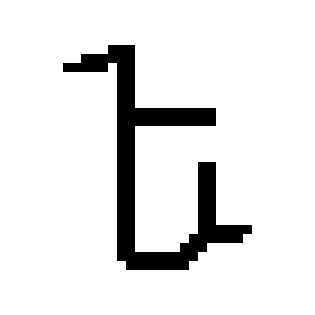

In [21]:
from PIL import Image

digit_number = -1

image = Image.fromarray(X_train_rc.reshape((-1, 35, 35))[digit_number], mode='P')

print('label: {}'.format(y_train_r[digit_number]))
display(image.resize((315, 315)))

# Использование дерева решений для решения задачи классификации рукописных символов (уменьшенный датасет, сжатые изображения)

Импорты

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Настройка параметров дерева при помощи кросс-валидации

In [23]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

tree_params = {'max_depth': list(range(15, 21))}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)

tree_grid.fit(X_train_rc, y_train_r)

print('max_depth: {}'.format(tree_grid.best_params_['max_depth']))
print('accuracy: {:.3}'.format(tree_grid.best_score_))

max_depth: 18
accuracy: 0.113


Обучение дерева на лучшем сочетании параметров

In [24]:
tree = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'], random_state=RANDOM_STATE)

tree.fit(X_train_rc, y_train_r)

y_tree_r_pred = tree.predict(X_test_rc)

Вычисление метрик для оценки качества работы дерева решений

In [25]:
print('accuracy: {:.3}'.format(accuracy_score(y_test_r, y_tree_r_pred)))

accuracy: 0.108


# Использование метода ближайших соседей для решения задачи классификации рукописных символов (уменьшенный датасет, сжатые изображения)

Импорты

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Настройка параметров метода ближайших соседей при помощи кросс-валидации

In [27]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 5)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)

knn_grid.fit(X_train_rc, y_train_r)

print('n_neighbors: {}'.format(knn_grid.best_params_['knn__n_neighbors']))
print('accuracy: {:.3}'.format(knn_grid.best_score_))

n_neighbors: 1
accuracy: 0.23


Обучение модели на методе ближайших соседей на лучшем сочетании параметров

In [28]:
knn = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['knn__n_neighbors'])

knn.fit(X_train_rc, y_train_r)

y_knn_r_pred = knn.predict(X_test_rc)

Вычисление метрик для оценки качества работы метода ближайших соседей

In [29]:
print('accuracy: {:.3}'.format(accuracy_score(y_test_r, y_knn_r_pred)))

accuracy: 0.258


# Использование логистической регрессии для решения задачи классификации рукописных символов (уменьшенный датасет, сжатые изображения)

Импорты

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Настройка параметров логистической регрессии при помощи кросс-валидации

In [31]:
logit = LogisticRegression(n_jobs=-1, random_state=RANDOM_STATE)

logit_params_с = [(x + 10) * (10 ** -7) for x in range(1, 6)]
logit_params = {'C': logit_params_с}

logit_grid = GridSearchCV(logit, logit_params, cv=5, n_jobs=-1)

logit_grid.fit(X_train_rc, y_train_r)

print('C: {}'.format(logit_grid.best_params_['C']))
print('accuracy: {:.3}'.format(logit_grid.best_score_))

C: 1.2999999999999998e-06
accuracy: 0.45


Обучение модели логистической регрессии на лучшем сочетании параметров

In [32]:
logit = LogisticRegression(C=logit_grid.best_params_['C'], n_jobs=-1, random_state=RANDOM_STATE)

logit.fit(X_train_rc, y_train_r)

y_logit_r_pred = logit.predict(X_test_rc)

Вычисление метрик для оценки качества работы логистической регрессии

In [33]:
print('accuracy: {:.3}'.format(accuracy_score(y_test_r, y_logit_r_pred)))

accuracy: 0.417


# Использование случайного леса для решения задачи классификации рукописных символов (уменьшенный датасет, сжатые изображения)

Импорты

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Настройка параметров случайного леса при помощи кросс-валидации

In [35]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

rf_params = {'n_estimators': list(range(300, 400, 20))}

rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)

rf_grid.fit(X_train_rc, y_train_r)

print('n_estimators: {}'.format(rf_grid.best_params_['n_estimators']))
print('accuracy: {:.3}'.format(rf_grid.best_score_))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


n_estimators: 340
accuracy: 0.424


Обучение случайного леса на лучшем сочетании параметров

In [36]:
rf = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'], random_state=RANDOM_STATE)

rf.fit(X_train_rc, y_train_r)

y_rf_r_pred = rf.predict(X_test_rc)

Вычисление метрик для оценки качества работы случайного леса

In [37]:
print('accuracy: {:.3}'.format(accuracy_score(y_test_r, y_rf_r_pred)))

accuracy: 0.42


# Использование случайного выбора для решения задачи классификации рукописных символов (уменьшенный датасет, сжатые изображения)

Импорты

In [38]:
from sklearn.dummy import DummyClassifier

Обучение случайного выбора

In [39]:
rand = DummyClassifier(strategy='uniform', random_state=RANDOM_STATE)

rand.fit(X_train_rc, y_train_r)

y_rand_r_pred = rand.predict(X_test_rc)

Вычисление метрик для оценки качества работы случайного выбора

In [41]:
print('accuracy: {:.3}'.format(accuracy_score(y_test_r, y_rand_r_pred)))

accuracy: 0.0117


# Сравнение четырех методов для датасета Omniglot (уменьшенный датасет, сжатые изображения)

Результаты работы

In [42]:
from sklearn.metrics import accuracy_score

print('DecisionTree accuracy      : {:.3}'.format(accuracy_score(y_test_r, y_tree_r_pred)))
print('Knn accuracy               : {:.3}'.format(accuracy_score(y_test_r, y_knn_r_pred)))
print('LogisticRegression accuracy: {:.3}'.format(accuracy_score(y_test_r, y_logit_r_pred)))
print('RandomForest accuracy      : {:.3}'.format(accuracy_score(y_test_r, y_rf_r_pred)))
print('Random accuracy            : {:.3}'.format(accuracy_score(y_test_r, y_rand_r_pred)))

DecisionTree accuracy      : 0.108
Knn accuracy               : 0.258
LogisticRegression accuracy: 0.417
RandomForest accuracy      : 0.42
Random accuracy            : 0.0117


При использовании уменьшенного датасета со сжатыми изображениями закономерно увеличился показатель acceracy всех методов. Это сильно связано с числом классов для нашей задачи классификации рукописных символов, а точнее с его уменьшением до 100 классов. Также использование такого варианта датасета позволило провести настройку параметров при помощи кросс-валидации для улучшения параметров моделей. В предыдущем случае сделать это не получилось как по причине большого времени на настройку, так и по причине ограничения на ОЗУ. Эти 2 факта суммарно дали значительный прирост к показателю accuracy. Метод выбора случайного класса приведен для наглядности.